In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("../data/dataset.csv")

In [43]:
BASE_PRICE = 10
ALPHA = 10000.0  # tuned sensitivity

In [44]:
def model1_pricing(lot_data, base_price=BASE_PRICE, alpha=ALPHA):
    prices = [base_price]
    
    for i in range(1, len(lot_data)):
        prev_price = prices[-1]
        occ_rate = lot_data.iloc[i]['Occupancy'] / lot_data.iloc[i]['Capacity']
        
        new_price = prev_price + alpha * occ_rate
        
        # Cap price between $5 and $20
        new_price = max(5, min(20, new_price))
        prices.append(new_price)
    
    lot_data['Model1Price'] = prices
    return lot_data

In [45]:
lot_id = "BHMBCCMKT01"
lot_data = df[df['SystemCodeNumber'] == lot_id].copy()

In [46]:
lot_data['DateTime'] = pd.to_datetime(
    lot_data['LastUpdatedDate'] + " " + lot_data['LastUpdatedTime'],
    format="%d-%m-%Y %H:%M:%S"
)
lot_data = lot_data.sort_values('DateTime')

lot_data = model1_pricing(lot_data)

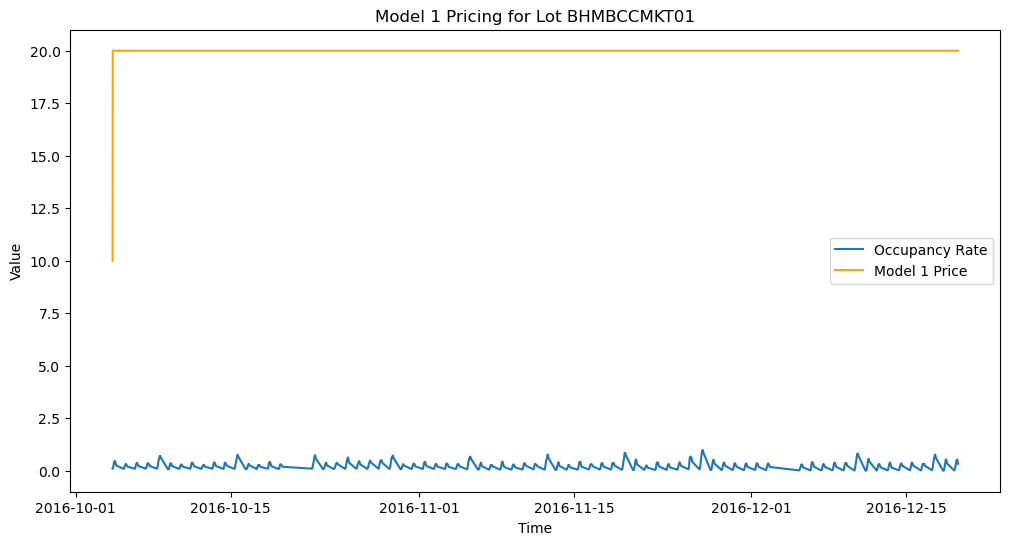

In [47]:
# Plot occupancy vs price
plt.figure(figsize=(12,6))
plt.plot(lot_data['DateTime'], lot_data['Occupancy']/lot_data['Capacity'], label="Occupancy Rate")
plt.plot(lot_data['DateTime'], lot_data['Model1Price'], label="Model 1 Price", color="orange")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Model 1 Pricing for Lot {lot_id}")
plt.legend()
plt.show()